In [1]:
# import required libraries 

import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn
import time
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import datasets

plt.style.use('ggplot')


In [2]:
# path to where ML files are stored
path = r'C:\Users\HSK\Desktop\bitirme-ML\MachineLearning CSV\MachineLearningCVE'
all_files = glob.glob(path + "/*.csv")
print(len(all_files))
# concatenate the 8 files into 1
veri= pd.concat((pd.read_csv(f) for f in all_files))

8


In [3]:
veri.dtypes
#veri.head()

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object

In [4]:
columns_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]

In [5]:
veri.columns=columns_names

In [6]:
veri.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
veri['Label']

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
692698    BENIGN
692699    BENIGN
692700    BENIGN
692701    BENIGN
692702    BENIGN
Name: Label, Length: 2830743, dtype: object

In [8]:
veri['Flow_Bytes_s'] = veri['Flow_Bytes_s'].astype('float64')
veri['Flow_Packets_s'] = veri['Flow_Packets_s'].astype('float64')
veri = veri.loc[:, ~veri.columns.duplicated()]

In [9]:
veri.isnull().any().any()

True

In [10]:
veri = veri.replace([np.inf, -np.inf], np.nan)
veri = veri.dropna()
veri.isnull().any().any()

False

In [11]:
veri['Label'].value_counts()

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

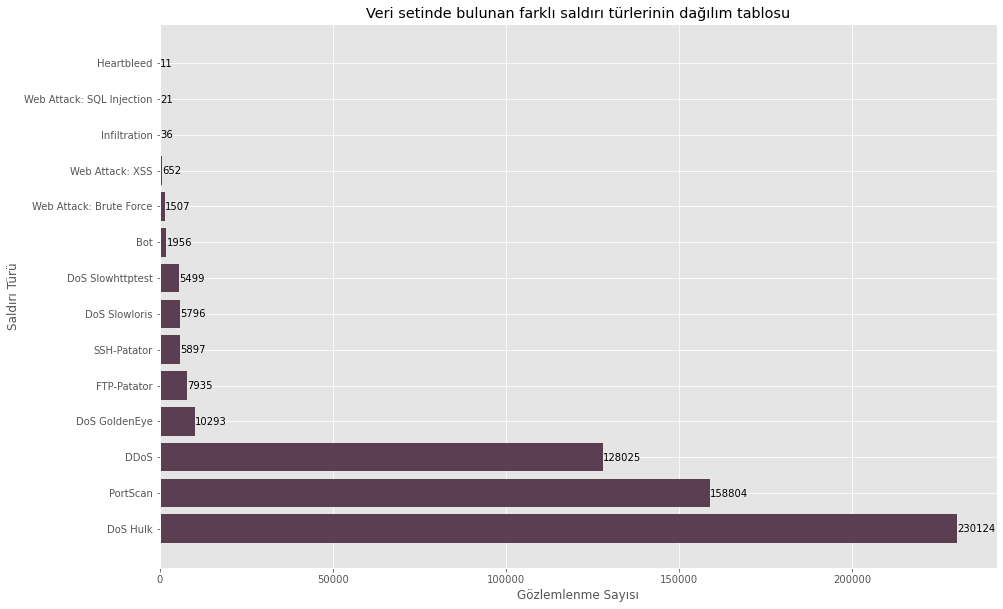

In [12]:
plt.figure(figsize=(15,10))

saldırı = ('DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS Slowloris','DoS Slowhttptest', 'Bot', 'Web Attack: Brute Force', 'Web Attack: XSS', 'Infiltration', 'Web Attack: SQL Injection', 'Heartbleed')
y_axis = np.arange(len(saldırı)) 
amount = veri['Label'].value_counts()[1:]
plt.barh(y_axis, amount, align='center', color='#5c3e52' )
plt.yticks(y_axis, saldırı)
plt.title('Veri setinde bulunan farklı saldırı türlerinin dağılım tablosu')
plt.xlabel('Gözlemlenme Sayısı')
plt.ylabel('Saldırı Türü')
for i, z in enumerate(amount):
    plt.text(z + 3, i-0.1 , str(z))
    
plt.show()

In [13]:
#Heartbleed, Web Attack � Sql Injection, Infiltation saldırılarına ait veri sayısı çok az olduğu için bu saldırıları verisetinden çıkarmamız gerekir.
veri = veri.replace(['Heartbleed', 'Web Attack � Sql Injection', 'Infiltration'], np.nan)
veri = veri.dropna()
veri['Label'].value_counts()

BENIGN                      2271320
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack � Brute Force       1507
Web Attack � XSS                652
Name: Label, dtype: int64

In [14]:
# Attack = 1; Benign = 0
veri['Attack'] = np.where(veri['Label'] == 'BENIGN', 0, 1)

In [15]:
#fazla saldırı türü olduğundan dolu bu saldırıları ortak özelliklerine göre gruplamak daha iyi bir sonuç elde edebilmemizi sağlar.
attack_groups = {'BENIGN': 'BENIGN', 
                'DoS Hulk': 'DOS',
                'PortScan': 'QUERY', 
                'DDoS': 'DDOS',
                'DoS GoldenEye': 'DOS', 
                'FTP-Patator': 'BRUTEFORCE',
                'SSH-Patator': 'BRUTEFORCE', 
                'DoS slowloris': 'DOS', 
                'DoS Slowhttptest': 'DOS',
                'Bot': 'BOTNET',
                'Web Attack � Brute Force': 'WEB', 
                'Web Attack � XSS': 'WEB'}

veri['new_Label'] = veri['Label'].map(lambda x: attack_groups[x])
#Map fonksiyonunda lambda kullanımı sayesinde bir veri türü için işlevsel kısa yolları kullanmak mümkündür.Tüm verilere ulaşabilmemizi sağlar.
veri['new_Label'].value_counts()

BENIGN        2271320
DOS            251712
QUERY          158804
DDOS           128025
BRUTEFORCE      13832
WEB              2159
BOTNET           1956
Name: new_Label, dtype: int64

Text(0.5, 1.0, 'Gruplanan Saldırı Türlerinin Dağılımı')

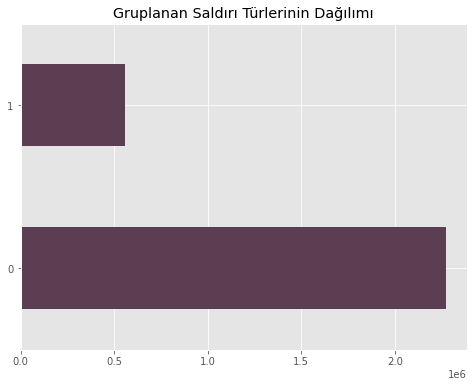

In [16]:
plt.figure(figsize=(8,6))
veri['Attack'].value_counts().plot(kind='barh', color='#5c3e52')
plt.title('Gruplanan Saldırı Türlerinin Dağılımı')

Text(0.5, 1.0, 'Gruplanan Saldırı Türlerinin Dağılımı')

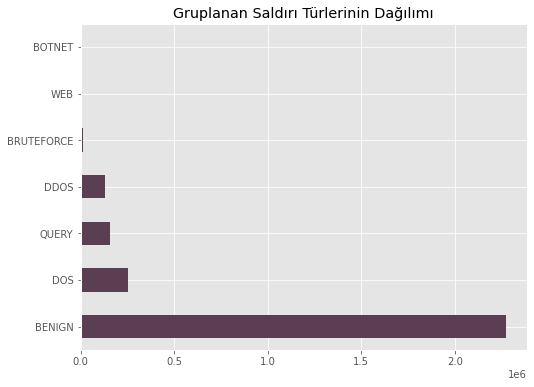

In [17]:
plt.figure(figsize=(8,6))
veri['new_Label'].value_counts().plot(kind= 'barh' , color = '#5c3e52')
plt.title('Gruplanan Saldırı Türlerinin Dağılımı')

In [18]:
veri.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Attack,new_Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN


In [19]:
veri['Label'].value_counts()


BENIGN                      2271320
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack � Brute Force       1507
Web Attack � XSS                652
Name: Label, dtype: int64

In [20]:
veri.shape
veri.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Attack,new_Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN


In [21]:
ys=veri['Attack']# Bağımlı Değişken
xs=veri.drop(['Attack','Label','new_Label'],axis=1)#Bağımsız Değişkenler
X_train,X_test,y_train,y_test=train_test_split(xs, ys, test_size=0.2, random_state=0)

In [22]:
X_train

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
259656,443,369215,2,0,12,0,6,6,6.000000,0.000000,...,1,20,0.0000,0.0000,0,0,0.000000e+00,0.000000e+00,0,0
82938,80,78847965,19,16,2198,9827,424,0,115.684210,189.307819,...,18,20,95681.2500,115249.5528,342425,36752,9.485747e+06,1.455376e+06,10000000,5883876
91669,40306,274,3,0,31,0,31,0,10.333333,17.897858,...,1,32,0.0000,0.0000,0,0,0.000000e+00,0.000000e+00,0,0
35921,53,31505,2,2,78,134,39,39,39.000000,0.000000,...,1,20,0.0000,0.0000,0,0,0.000000e+00,0.000000e+00,0,0
332884,56972,48,1,1,0,0,0,0,0.000000,0.000000,...,0,32,0.0000,0.0000,0,0,0.000000e+00,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113209,80,84046990,8,6,686,11595,343,0,85.750000,158.778147,...,2,32,3.0000,0.0000,3,3,8.380000e+07,0.000000e+00,83800000,83800000
260895,53,32095,1,1,45,61,45,45,45.000000,0.000000,...,0,32,0.0000,0.0000,0,0,0.000000e+00,0.000000e+00,0,0
78772,80,99406624,6,6,300,11595,300,0,50.000000,122.474487,...,1,32,5.0000,0.0000,5,5,9.940000e+07,0.000000e+00,99400000,99400000
252439,80,110630675,21,21,6773,5847,1405,0,322.523810,581.688630,...,20,20,149164.8182,409581.7640,1383867,22859,9.906085e+06,3.175180e+05,10000000,8948938


In [23]:
y_train

259656    0
82938     0
91669     0
35921     0
332884    0
         ..
113209    1
260895    0
78772     1
252439    0
80042     0
Name: Attack, Length: 2262246, dtype: int32

In [24]:
# Normalise
min_max_scaler = MinMaxScaler().fit(X_train)

# Apply normalisation to dataset
X_train = min_max_scaler.transform(X_train)

X_test = min_max_scaler.transform(X_test)

# All values between 0 and 1
pd.Series(X_train.flatten()).describe()

count    1.741929e+08
mean     7.764801e-02
std      2.380098e-01
min      0.000000e+00
25%      0.000000e+00
50%      9.999999e-08
75%      3.729072e-03
max      1.000000e+00
dtype: float64

In [25]:
X_train.shape

(2262246, 77)

In [26]:
chi2_secimi = SelectKBest(score_func=chi2, k=X_train.shape[1]).fit(X_train,y_train)

secim = []
for i in chi2_secimi.pvalues_:
    if i < 0.05:
        secim.append(i)
print(len(secim))



65


In [27]:
# perform selectkbest with k=65
chi2_secimi = SelectKBest(score_func=chi2, k=65)
fit = chi2_secimi.fit(X_train, y_train)
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)

In [28]:
X_train.shape

(2262246, 65)

In [29]:
secilen_ozellikler = veri.columns[chi2_secimi.get_support(indices=True)]
secilen_ozellikler

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Packets_s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Fwd_URG_Flags', 'Fwd_Packets_s',
       'Bwd_Packets_s', 'Min_Packet_Length', 'Max_Packet_Length',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
       'FIN_Flag_Count', 'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count',
       'ACK_Flag_Count', 'URG_Flag_Count', 'CWE_Flag_Count', 'EC

In [30]:
veri.shape
veri.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Attack,new_Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,BENIGN


In [31]:
# Destek Vektör Makinesi (SVM- Support Vector Machine) Uygulaması

In [32]:
svr_model=LinearSVC().fit(X_train,y_train)

In [33]:
y_pred=svr_model.predict(X_test)

In [34]:
y_test

177727    0
156516    0
321590    1
19849     0
27391     0
         ..
301155    0
114730    0
148571    0
148854    1
25340     1
Name: Attack, Length: 565562, dtype: int32

In [35]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [36]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[438514  16251]
 [ 24438  86359]]


In [37]:
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred))

SVM Accuracy: 0.9280556331578147


In [38]:
print("SVM Precision score: {}".format(precision_score(y_test,y_pred)))

SVM Precision score: 0.8416236234285157


In [39]:
print("SVM Recall score: {}".format(recall_score(y_test,y_pred)))

SVM Recall score: 0.7794344612218742


In [40]:
print("SVM F1 Score: {}".format(f1_score(y_test,y_pred)))

SVM F1 Score: 0.8093361511103196


In [42]:
# Karar Ağacı (Decision Tree) Uygulaması

In [43]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [44]:
cart_model

DecisionTreeClassifier()

In [45]:
y_pred = cart_model.predict(X_test)

In [46]:
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.9987446115545245


In [47]:
print("Decision Tree Precision score: {}".format(precision_score(y_test,y_pred)))

Decision Tree Precision score: 0.9968587238114152


In [48]:
print("Decision Tree Recall score: {}".format(recall_score(y_test,y_pred)))

Decision Tree Recall score: 0.9967327635224781


In [49]:
print("Decision Tree F1 Score: {}".format(f1_score(y_test,y_pred)))

Decision Tree F1 Score: 0.9967957396876976


In [51]:
# Naive Bayes Uygulaması

In [52]:
nb_model = MultinomialNB().fit(X_train, y_train)

In [53]:
nb_model

MultinomialNB()

In [54]:
y_pred = nb_model.predict(X_test)

In [55]:
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred))

Naive Bayes Accuracy: 0.8689091558485188


In [56]:
print("Naive Bayes Precision score: {}".format(precision_score(y_test,y_pred)))

Naive Bayes Precision score: 0.8046777598616952


In [57]:
print("Naive Bayes Recall score: {}".format(recall_score(y_test,y_pred)))

Naive Bayes Recall score: 0.436898110959683


In [58]:
print("Naive Bayes F1 Score: {}".format(f1_score(y_test,y_pred)))

Naive Bayes F1 Score: 0.5663160850287211


In [60]:
# Random Forest Uygulaması

In [61]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [62]:
rf_model

RandomForestClassifier()

In [63]:
y_pred = rf_model.predict(X_test)

In [64]:
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.9988011924422079


In [65]:
print("Random Forest Precision score: {}".format(precision_score(y_test,y_pred)))

Random Forest Precision score: 0.9963937648193727


In [66]:
print("Random Forest Recall score: {}".format(recall_score(y_test,y_pred)))

Random Forest Recall score: 0.9974909067935053


In [67]:
print("Random Forest F1 Score: {}".format(f1_score(y_test,y_pred)))

Random Forest F1 Score: 0.9969420339533458


In [69]:
models = []
models.append(('svr_model', LinearSVC()))
models.append(('cart_model', DecisionTreeClassifier()))
models.append(('nb_model', MultinomialNB()))
models.append(('rf_model', RandomForestClassifier()))

In [70]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
         kfold = model_selection.KFold(n_splits=2, random_state=None, shuffle=False)
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

svr_model: 0.927260 (0.000644)
cart_model: 0.998661 (0.000028)
nb_model: 0.868460 (0.000083)
rf_model: 0.998758 (0.000007)


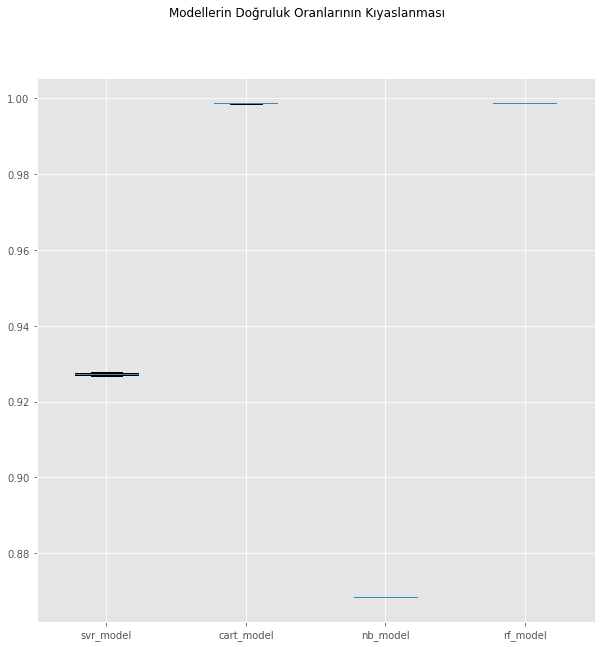

In [71]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Modellerin Doğruluk Oranlarının Kıyaslanması')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [72]:
results = []
names = []
scoring = 'precision'
for name, model in models:
         kfold = model_selection.KFold(n_splits=2, random_state=None, shuffle=False)
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

svr_model: 0.841881 (0.001002)
cart_model: 0.996578 (0.000055)
nb_model: 0.806262 (0.001932)
rf_model: 0.996849 (0.000205)


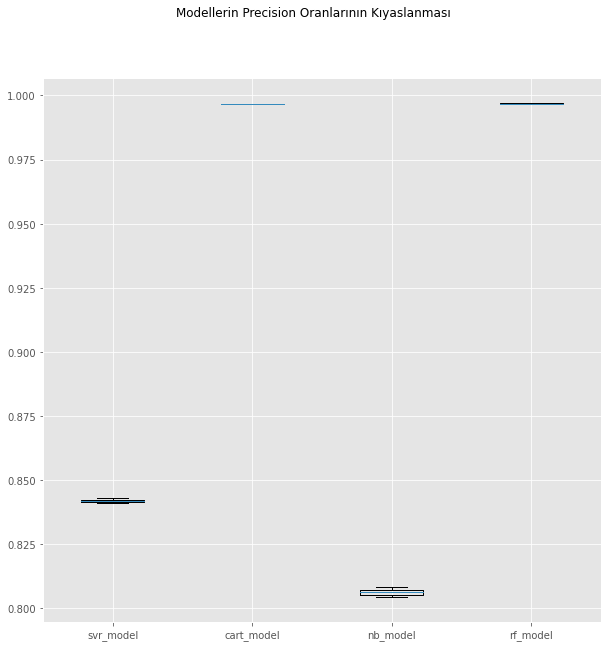

In [73]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Modellerin Precision Oranlarının Kıyaslanması')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [74]:
results = []
names = []
scoring = 'recall'
for name, model in models:
         kfold = model_selection.KFold(n_splits=2, random_state=None, shuffle=False)
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

svr_model: 0.776640 (0.003655)
cart_model: 0.996652 (0.000066)
nb_model: 0.437438 (0.000740)
rf_model: 0.997216 (0.000010)


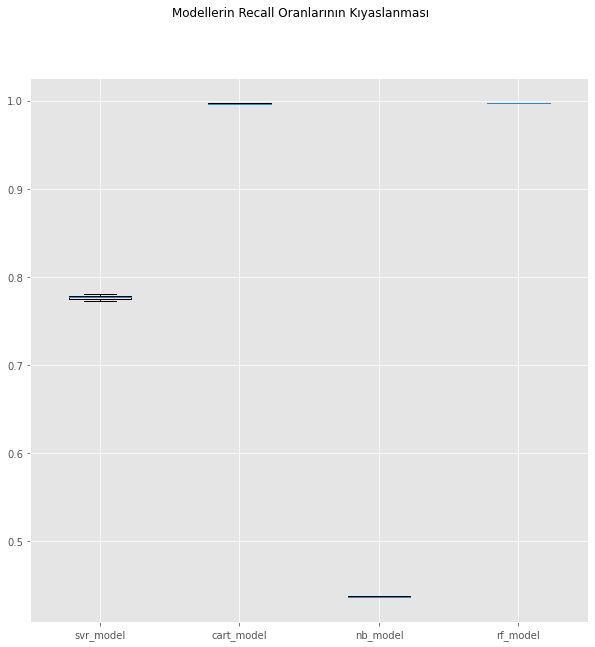

In [75]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Modellerin Recall Oranlarının Kıyaslanması')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [76]:
results = []
names = []
scoring = 'f1'
for name, model in models:
         kfold = model_selection.KFold(n_splits=2, random_state=None, shuffle=False)
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

svr_model: 0.807943 (0.002439)
cart_model: 0.996568 (0.000051)
nb_model: 0.567162 (0.001100)
rf_model: 0.996720 (0.000035)


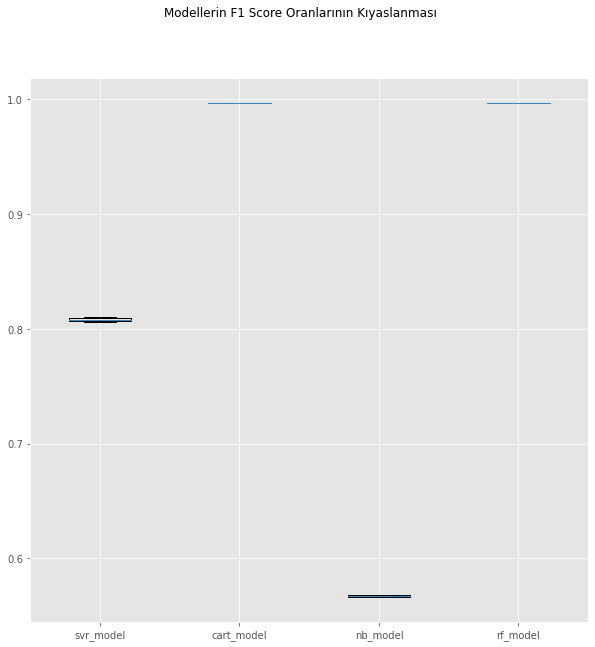

In [77]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Modellerin F1 Score Oranlarının Kıyaslanması')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()